## Dataset Head:
          0         1         2    3    4    5    6    7    8    9
0 -0.768094 -1.062899 -1.502895  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1 -1.326407 -0.725706 -1.436839  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2 -0.870501 -0.944614 -0.796163  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3 -1.198228 -0.633996 -1.031985  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4 -0.581253 -0.839979 -0.762256  0.0  0.0  0.0  0.0  0.0  0.0  0.0

## Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
dtypes: float

C:\Users\user\AppData\Local\Temp\ipykernel_10728\36197089.py:56: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_result_2d[:, 0], y=pca_result_2d[:, 1], palette='viridis', s=50, alpha=0.7)


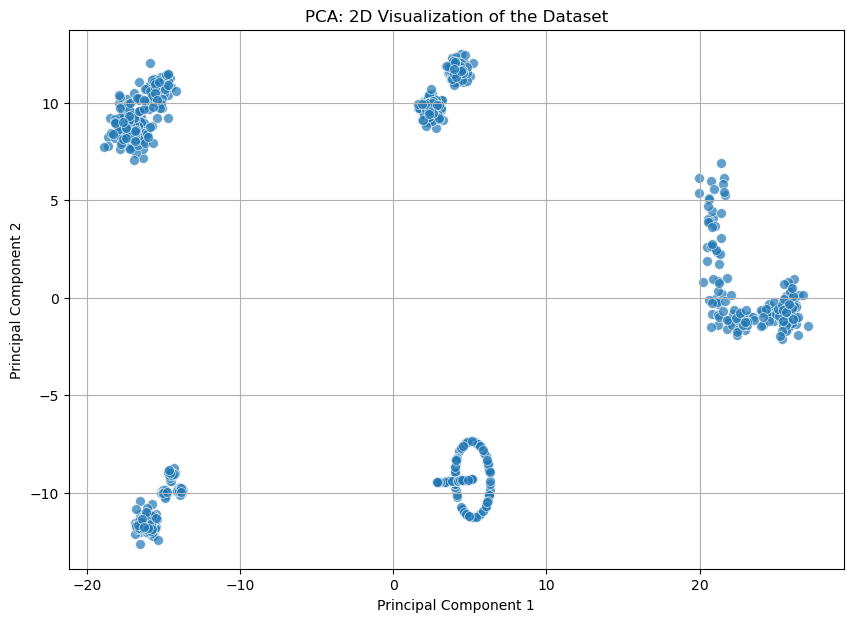

C:\Users\user\AppData\Local\Temp\ipykernel_10728\36197089.py:69: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2], cmap='viridis', s=30, alpha=0.7)


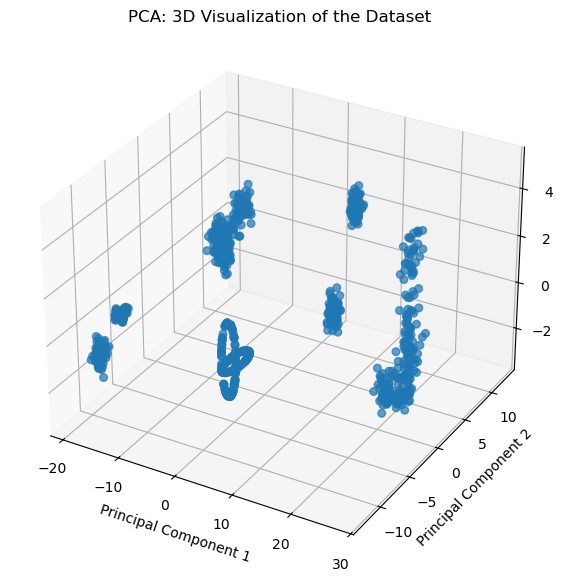

C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Performing t-SNE (this might take a few moments)...


C:\Users\user\AppData\Local\Temp\ipykernel_10728\36197089.py:92: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_result_2d[:, 0], y=tsne_result_2d[:, 1], palette='viridis', s=50, alpha=0.7)


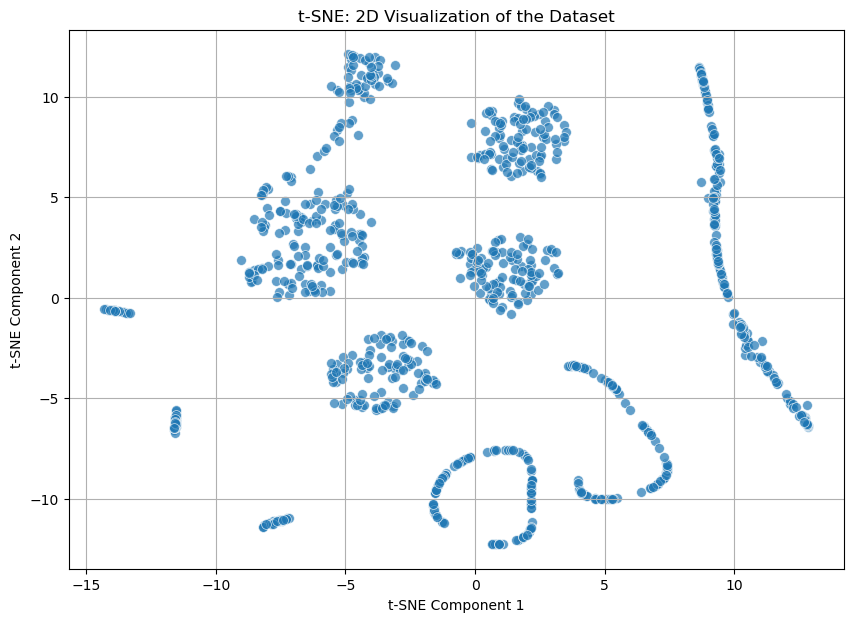

C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_10728\36197089.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(tsne_result_3d[:, 0], tsne_result_3d[:, 1], tsne_result_3d[:, 2], cmap='viridis', s=30, alpha=0.7)


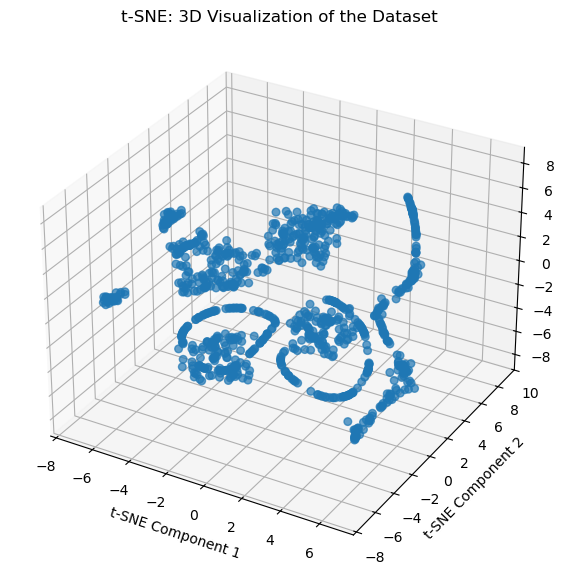


Analysis complete. Check the plots for patterns.


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load the dataset
# The data is tab-separated.
try:
    df = pd.read_csv('challenge.txt', sep='\t', header=None)
except FileNotFoundError:
    print("Error: 'challenge.txt' not found. Please ensure the file is in the correct directory.")
    exit()

print("## Dataset Head:")
print(df.head())
print("\n## Dataset Info:")
df.info()

# Examine dimensions
num_rows, num_cols = df.shape
print(f"\nOriginal number of dimensions (columns): {num_cols}")
print(f"Number of data points (rows): {num_rows}")

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {missing_values}")

if missing_values > 0:
    print("\nMissing values per column:")
    print(df.isnull().sum())
    # Basic imputation strategy: fill with mean for numeric columns
    # More sophisticated methods might be needed depending on the data
    for col in df.columns:
        if df[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col] = df[col].fillna(df[col].mean())
                print(f"Filled missing values in column {col} with its mean.")
            else:
                # For non-numeric, fill with mode or a constant, e.g., 'Unknown'
                # This dataset seems purely numeric, so this might not be triggered.
                df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
                print(f"Filled missing values in column {col} with its mode or 'Unknown'.")
    print(f"\nTotal missing values after imputation: {df.isnull().sum().sum()}")


# --- PCA Visualization ---
print("\nPerforming PCA...")
# 2D PCA
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(df)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result_2d[:, 0], y=pca_result_2d[:, 1], palette='viridis', s=50, alpha=0.7)
plt.title('PCA: 2D Visualization of the Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# 3D PCA
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(df)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2], cmap='viridis', s=30, alpha=0.7)
ax.set_title('PCA: 3D Visualization of the Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# --- t-SNE Visualization ---
# t-SNE can be computationally expensive on large datasets.
# If the dataset is very large, consider using a subset or a faster variant like UMAP.
# For this dataset size, it should be manageable.
print("\nPerforming t-SNE (this might take a few moments)...")

# It's good practice to run PCA before t-SNE if dimensionality is very high,
# but with 10 dimensions, we can try applying t-SNE directly.
# If performance is an issue, consider df_pca_reduced = PCA(n_components=min(50, num_cols)).fit_transform(df)
# and then apply t-SNE on df_pca_reduced.

# 2D t-SNE
tsne_2d = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42) # perplexity can be tuned
tsne_result_2d = tsne_2d.fit_transform(df)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_result_2d[:, 0], y=tsne_result_2d[:, 1], palette='viridis', s=50, alpha=0.7)
plt.title('t-SNE: 2D Visualization of the Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

# 3D t-SNE
tsne_3d = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42) # perplexity can be tuned
tsne_result_3d = tsne_3d.fit_transform(df)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_result_3d[:, 0], tsne_result_3d[:, 1], tsne_result_3d[:, 2], cmap='viridis', s=30, alpha=0.7)
ax.set_title('t-SNE: 3D Visualization of the Dataset')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()

print("\nAnalysis complete. Check the plots for patterns.")

## Dataset Head with Feature Names:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.768094  -1.062899  -1.502895        0.0        0.0        0.0   
1  -1.326407  -0.725706  -1.436839        0.0        0.0        0.0   
2  -0.870501  -0.944614  -0.796163        0.0        0.0        0.0   
3  -1.198228  -0.633996  -1.031985        0.0        0.0        0.0   
4  -0.581253  -0.839979  -0.762256        0.0        0.0        0.0   

   feature_6  feature_7  feature_8  feature_9  
0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0  

## Descriptive Statistics:
                   mean     median        std       min       25%        50%  \
feature_0  9.600000e+00   7.299342   9.072724 -1.998575  0.309105   7.299342   
feature_1  1.600000e+01  19.141101  15.027236 -2.334028  0.36

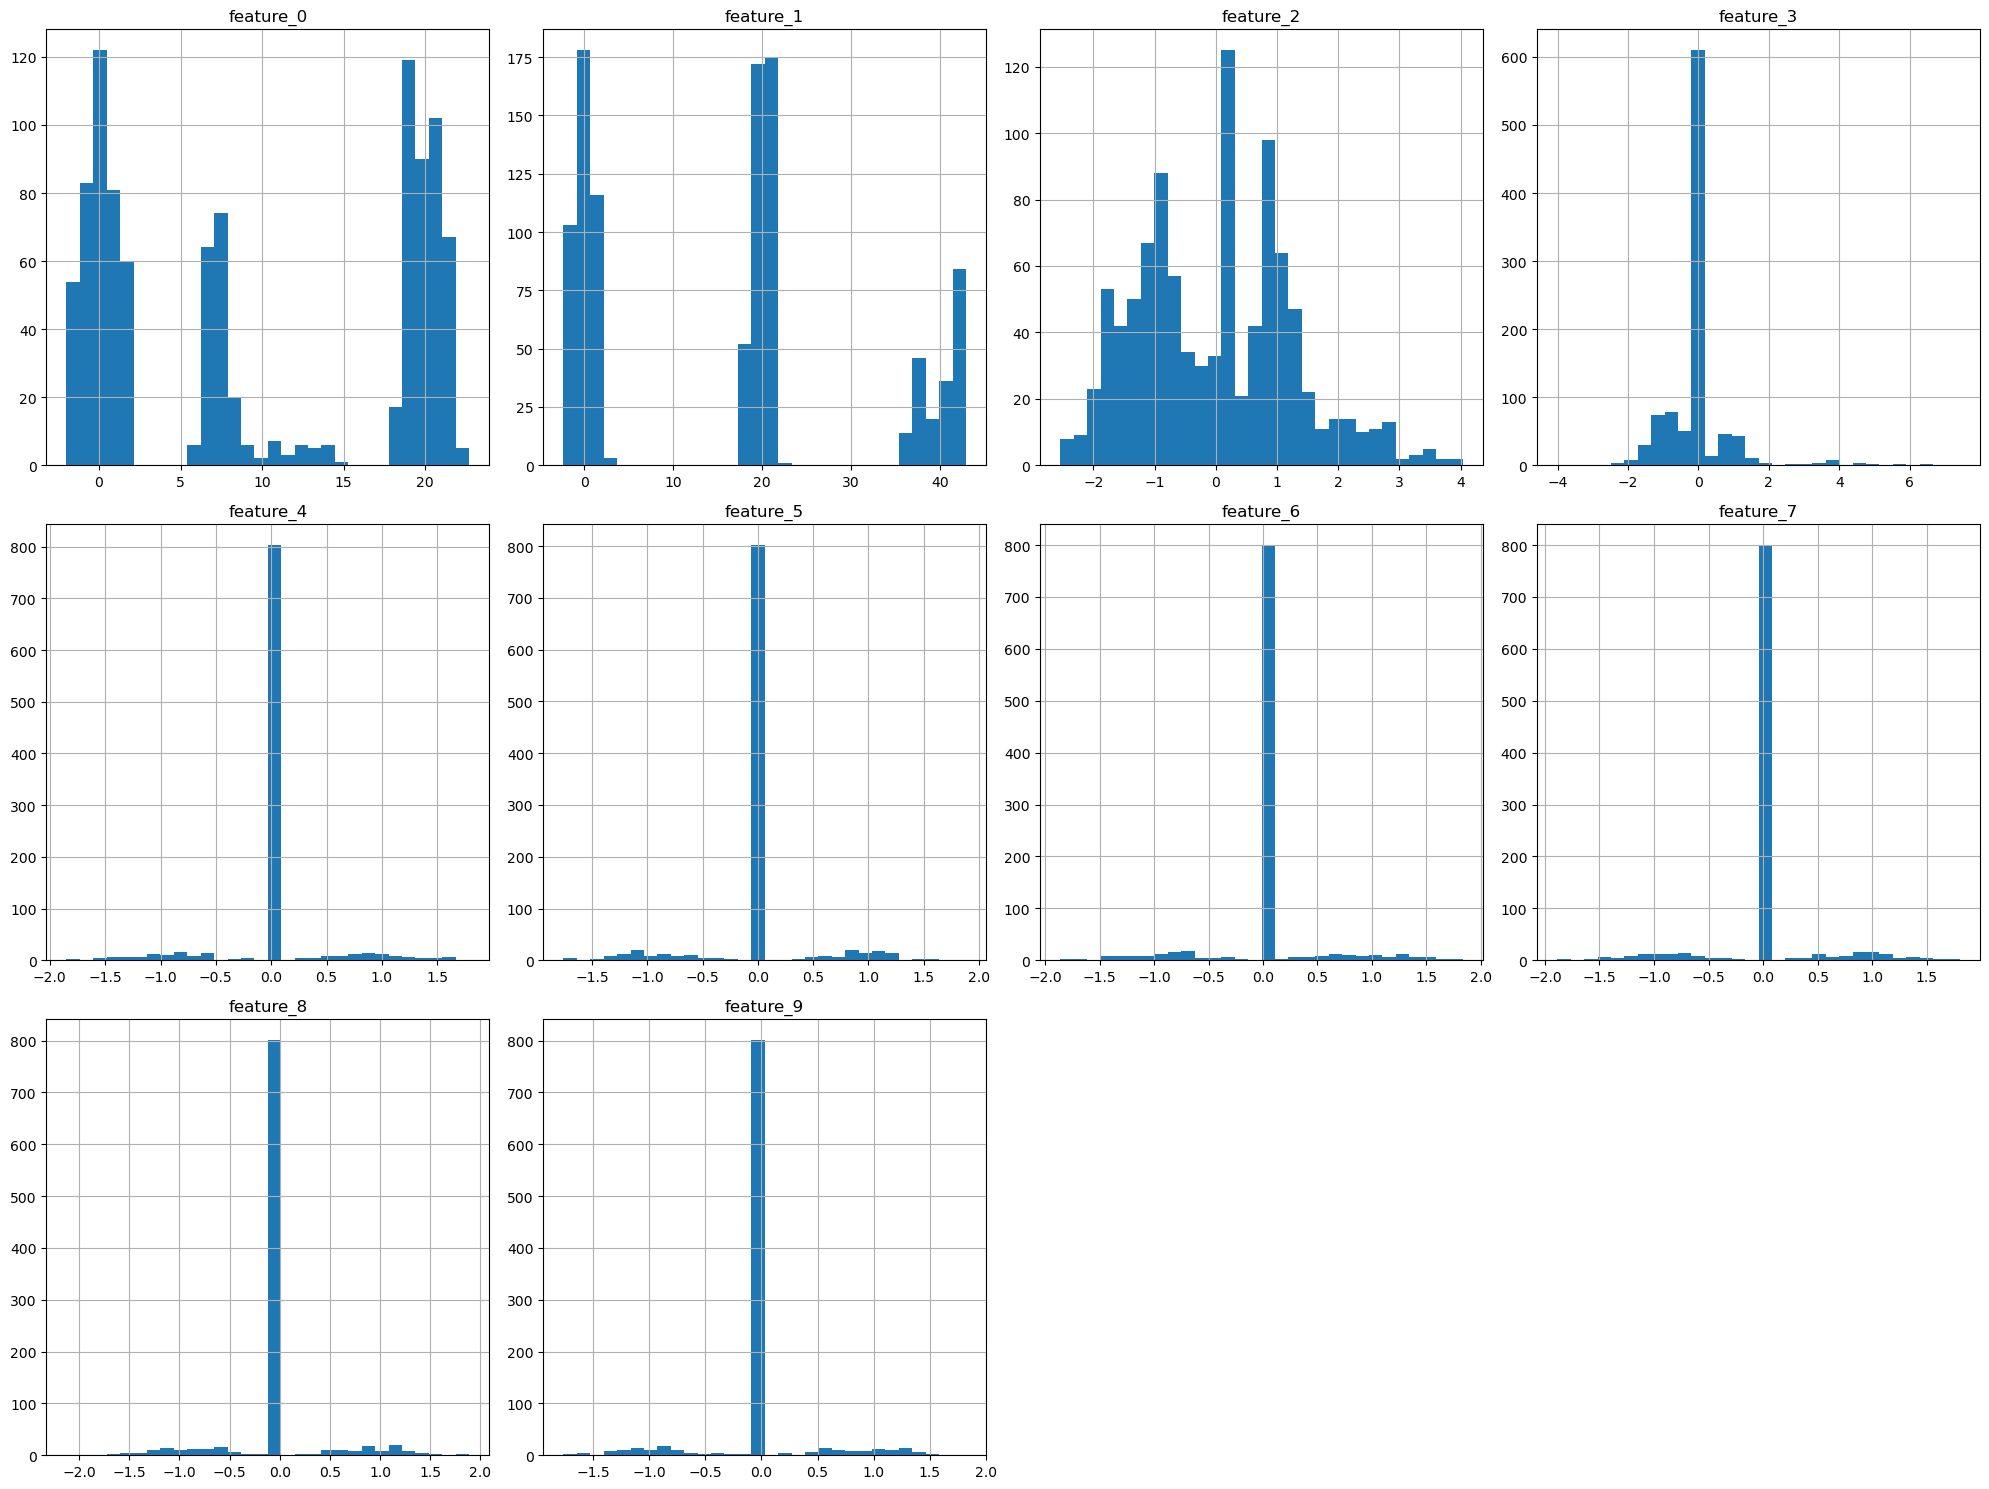


Performing Shapiro-Wilk normality test for each feature (p-value < 0.05 suggests non-normality):
Feature 'feature_0': Statistics=0.817, p-value=0.000
  -> Feature 'feature_0' likely has a non-normal distribution.
Feature 'feature_1': Statistics=0.845, p-value=0.000
  -> Feature 'feature_1' likely has a non-normal distribution.
Feature 'feature_2': Statistics=0.976, p-value=0.000
  -> Feature 'feature_2' likely has a non-normal distribution.
Feature 'feature_3': Statistics=0.676, p-value=0.000
  -> Feature 'feature_3' likely has a non-normal distribution.
Feature 'feature_4': Statistics=0.626, p-value=0.000
  -> Feature 'feature_4' likely has a non-normal distribution.
Feature 'feature_5': Statistics=0.633, p-value=0.000
  -> Feature 'feature_5' likely has a non-normal distribution.
Feature 'feature_6': Statistics=0.629, p-value=0.000
  -> Feature 'feature_6' likely has a non-normal distribution.
Feature 'feature_7': Statistics=0.630, p-value=0.000
  -> Feature 'feature_7' likely has a

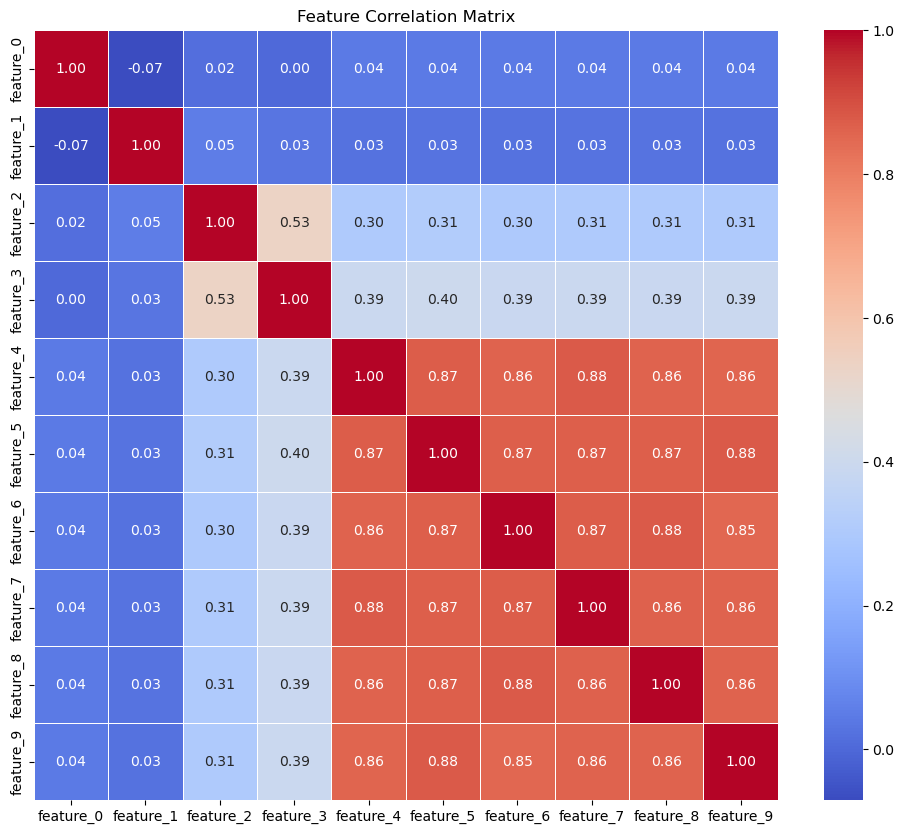


Correlation Matrix values:
           feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0   1.000000  -0.070466   0.016294   0.003634   0.042588   0.042597   
feature_1  -0.070466   1.000000   0.054627   0.033128   0.025379   0.026587   
feature_2   0.016294   0.054627   1.000000   0.531965   0.304526   0.310113   
feature_3   0.003634   0.033128   0.531965   1.000000   0.391350   0.400350   
feature_4   0.042588   0.025379   0.304526   0.391350   1.000000   0.870721   
feature_5   0.042597   0.026587   0.310113   0.400350   0.870721   1.000000   
feature_6   0.043261   0.025107   0.301183   0.386955   0.859231   0.867794   
feature_7   0.043483   0.025946   0.305056   0.389657   0.875492   0.866858   
feature_8   0.043791   0.026053   0.305016   0.386451   0.858010   0.866950   
feature_9   0.042992   0.025683   0.305600   0.391081   0.856133   0.876194   

           feature_6  feature_7  feature_8  feature_9  
feature_0   0.043261   0.043483   0.043791   0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset (assuming 'challenge.txt' is in the same directory)
# The data is tab-separated and has no header.
try:
    df = pd.read_csv('challenge.txt', sep='\t', header=None)
    # Assign generic column names for easier reference
    df.columns = [f'feature_{i}' for i in range(df.shape[1])]
except FileNotFoundError:
    print("Error: 'challenge.txt' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

print("## Dataset Head with Feature Names:")
print(df.head())

# --- 1. Descriptive Statistics ---
print("\n## Descriptive Statistics:")
desc_stats = df.describe().T # Transpose for better readability
desc_stats['median'] = df.median()
desc_stats = desc_stats[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']] # Reorder for clarity
print(desc_stats)

# --- 2. Distribution Analysis (Normality) ---
print("\n## Distribution Analysis (Histograms and Normality Tests):")
# Visually inspect histograms
print("\nGenerating histograms for each feature...")
df.hist(bins=30, figsize=(20, 15), layout=(-1, 4)) # Adjust layout as needed
plt.tight_layout()
plt.show()

print("\nPerforming Shapiro-Wilk normality test for each feature (p-value < 0.05 suggests non-normality):")
non_normal_features = []
for column in df.columns:
    # Shapiro-Wilk test is suitable for samples up to 5000.
    # For larger samples, D'Agostino's K^2 test (stats.normaltest) can be used.
    # Let's handle potential issues with constant columns (no variance) for normality tests.
    if df[column].nunique() <= 1: # If the column is constant or has only one unique value
        print(f"Feature '{column}': Constant or near-constant value. Normality test skipped.")
        continue
    
    try:
        stat, p_value = stats.shapiro(df[column].dropna()) # Drop NA for the test
        print(f"Feature '{column}': Statistics={stat:.3f}, p-value={p_value:.3f}")
        if p_value < 0.05:
            print(f"  -> Feature '{column}' likely has a non-normal distribution.")
            non_normal_features.append(column)
        else:
            print(f"  -> Feature '{column}' likely has a normal distribution.")
    except Exception as e:
        print(f"Could not perform Shapiro-Wilk test for feature '{column}': {e}")


if non_normal_features:
    print("\nFeatures identified as potentially non-normal based on Shapiro-Wilk test (p < 0.05):")
    print(", ".join(non_normal_features))
else:
    print("\nNo features identified as clearly non-normal by the Shapiro-Wilk test (p < 0.05).")

print("\nNote: Visual inspection of histograms is also crucial for assessing normality.")
print("Skewness and kurtosis can also be calculated for further insights:")
for column in df.columns:
    print(f"Feature '{column}': Skewness={df[column].skew():.2f}, Kurtosis={df[column].kurtosis():.2f}")


# --- 3. Correlation Matrix ---
print("\n## Correlation Matrix Analysis:")
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

print("\nCorrelation Matrix values:")
print(correlation_matrix)

# Find pairs with the highest absolute correlation (excluding self-correlation)
print("\nIdentifying highest correlations...")
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highest_corr_pairs = []

for column in upper.columns:
    for index in upper.index:
        value = upper.loc[index, column]
        if pd.notna(value):
            highest_corr_pairs.append(((index, column), value))

# Sort by absolute correlation value in descending order
highest_corr_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

print("\nTop 5 highest absolute correlations between different features:")
for i, ((feat1, feat2), corr_val) in enumerate(highest_corr_pairs[:5]):
    print(f"{i+1}. Features: ('{feat1}', '{feat2}'), Correlation: {corr_val:.4f}")

if not highest_corr_pairs:
    print("No distinct feature pairs found to report correlation (e.g., only one feature or all correlations are NaN).")